In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import pandas as pd
import io
import requests

def unix_timestamp(date_string):
    # Input date as a string in the format 'YYYY-MM-DD'
    # Convert the date string to a datetime object
    date_obj = datetime.strptime(date_string, '%Y-%m-%d')
    # Convert the datetime object to a Unix timestamp
    return int(date_obj.timestamp())

proxies=None
try:
    proxy=open("./proxy.cfg").read().splitlines()
    proxy_host=proxy[0]
    proxy_port=proxy[1]
    '''
        RICORDA : CONFIGURA HTTPS COME HTTP
    '''
    proxies={
        "http": f"http://{proxy_host}:{proxy_port}",
        "https": f"http://{proxy_host}:{proxy_port}"
    }
    
except:
    proxies=None


'''
    PER EVITARE ERRORE 403 DEVO METTERE PARAMETRO HEADERS
'''
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
}


# Formato delle url e query, e parametri

<b>Formato della query url :</b>
 https://query1.finance.yahoo.com/v7/finance/download/SYMBOL?period1=PERIOD1&period2=PERIOD1                    &interval=1d&events=history
<br>
In dettaglio : <br>

   https://query1.finance.yahoo.com/v7/finance/download/SYMBOL <br>&emsp;&emsp;
                    ?period1=PERIOD1<br>&emsp;&emsp;
                    &period2=PERIOD1<br>&emsp;&emsp;
                    &interval=1d<br>&emsp;&emsp;
                    &events=history<br>&emsp;&emsp;


<b>Codice python per creare una stringa query :</b>
```python 

symbol = "AAPL" 
start_date="1640995200"      # Unix timestamp for the start date
end_date="1640998500"        # Unix timestamp for the end date
url = f"https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={start_date}&period2={end_date}&interval=1d&events=history"

```
<b>Codice python per ottenere la data in formato UNIX :</b>
```python 

from datetime import datetime
# Input date as a string in the format 'YYYY-MM-DD'
# Convert the date string to a datetime object
date_obj = datetime.strptime(date_string, '%Y-%m-%d')
# Convert the datetime object to a Unix timestamp
date_unix=int(date_obj.timestamp())

```
<br>


<b>Available Query Parameters</b>


There are five adjustable parameters that can be used to get different results.
- interval - The time interval between two data points. Can be 1m 2m 5m 15m 30m 60m 90m 1h 1d 5d 1wk 1mo 3mo
- range - The range for which the data is returned. Can be "max" or "previous".
- period1 - UNIX timestamp representation of the date you wish to start
 at
- period2 - UNIX timestamp representation of the date you wish to end
 at
- close - Adjusts the price type to be returned. valid values are adjusted and unadjusted
- events=div%7Csplit - will include dividends and splits
- includePrePost which takes true or false

Using these additional parameters will help you fine-tu

# Dati giornalieri 

Available Query Parameters

There are five adjustable parameters that can be used to get different results.
- interval - The time interval between two data points. Can be 1m 2m 5m 15m 30m 60m 90m 1h 1d 5d 1wk 1mo 3mo
- range - The range for which the data is returned. Can be "max" or "previous".
- period1 - UNIX timestamp representation of the date you wish to start
 at
- period2 - UNIX timestamp representation of the date you wish to end
 at
- close - Adjusts the price type to be returned. valid values are adjusted and unadjusted
- events=div%7Csplit - will include dividends and splits
- includePrePost which takes true or false

Using these additional parameters will help you fine-tu

# Testare un simbolo

In [10]:
from datetime import datetime
from datetime import timedelta
import requests

symbol="SB=F"
now=datetime.now()
today="{}-{}-{}".format(now.year,now.month,now.day)

start=now- timedelta(days=1*365)
_start_date="{}-{}-{}".format(start.year,start.month,start.day)
_end_date=today
start_date=unix_timestamp(_start_date)
end_date=unix_timestamp(_end_date)
url = f"https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={start_date}&period2={end_date}&interval=1d&events=history"


if proxies is not None:
    response = requests.get(url,proxies=proxies,headers=headers)
else:
    response = requests.get(url,headers=headers)

if response.status_code == 200:
    # Data is available in response.text
    print("Response 200 : OK for symbol {}".format(symbol))
    df= pd.read_csv(io.StringIO(response.text))
    df['Symbol']=symbol
    display(df.tail())
else:
    print("Error recuperando simbolo {}".format(symbol))
    print(f"Error fetching data. Status code: {response.status_code}")
    


Response 200 : OK for symbol SB=F


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
248,2024-01-10,21.580000,21.940001,21.360001,21.410000,21.410000,49327,SB=F
249,2024-01-11,21.410000,21.910000,21.320000,21.760000,21.760000,45454,SB=F
250,2024-01-12,21.889999,21.950001,21.559999,21.610001,21.610001,40896,SB=F
251,2024-01-15,21.889999,21.950001,21.559999,21.610001,21.610001,0,SB=F
252,2024-01-16,21.850000,22.639999,21.850000,22.520000,22.520000,0,SB=F


In [11]:
indici={"^DJI":'DowJones',"ES=F":"S&p500","NQ=F":'NasdQ',"RTY=F":'Russel2000',
        "^GDAXI":'DAX',"FTSEMIB.MI":'FTESEMIB'}

metalliP={"GC=F":'Oro',"SI=F":'Argento',"PL=F":'Platino'}
metalliI={ "HG=F":'Rame',"ALI=F":"Alluminio","PA=F":"Palladio"}
energia={'NG=F':"Natural gas","CL=F":"Crude oil"}
coloniali={"SB=F":"Zuzzhero",  "KC=F":'Coffee',"CC=F":'Cocoa',"OJ=F":'OrangeJuice'}
agricoli={ "ZC=F":'Corn',"ZW=F":'Wheat',"ZS=F":'SoyaBeans',"ZL=F":"SoyaBeanOil"}

commodities={**metalliP,**metalliI,**energia,**coloniali,**agricoli,**indici}
metalli={**metalliP,**metalliI}



index_keys=list(indici.keys())
metal_keys=list(metalli.keys())
energy_keys=list(energia.keys())
colonial_keys=list(coloniali.keys())
agricol_keys=list(agricoli.keys())
index_values=list(indici.values())
metal_values=list(metalli.values())
metalI_values=list(metalliI.values())
metalP_values=list(metalliP.values())

energy_values=list(energia.values())
colonial_values=list(coloniali.values())
agricol_values=list(agricoli.values())


# Trasformo in wide dataframe

In [12]:
dfx=df.pivot(index='Date',columns='Symbol',values='Close')
dfx.head()

Symbol,SB=F
Date,
2023-01-17,20.139999
2023-01-18,19.820000
2023-01-19,19.680000
2023-01-20,19.719999
2023-01-23,19.700001


# Normalizzo

In statistica, la normalizzazione consiste essenzialmente nel limitare l'escursione di un insieme di valori entro un certo intervallo predefinito, che solitamente coincide con i numeri reali compresi tra 0 e 1.

Sia \begin{gather*}
x_{norm}
\end{gather*} la normalizzazione di x allora:
\begin{gather*}
{\displaystyle x_{norm}=(x-min(x))/(max(x)-min(x))}\end{gather*}

Dunque, i dati sono caratterizzati da campo di variazione coincidente con l'intervallo [0,1]-
```python
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dfx)
cols=dfx.columns
df_normalized = pd.DataFrame(np_scaled, columns = cols,index=dfx.index)
df_normalized.head(3)
```


In [9]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dfx)

dfwide=df.pivot(index='Date',columns='Symbol',values='Close')
cols=dfwide.columns

df_normalized = pd.DataFrame(np_scaled, columns = cols,index=dfwide.index)
df_normalized.head(3)

Symbol,SB=F
Date,
2023-01-17,0.055623
2023-01-18,0.016929
2023-01-19,0.000000


In [16]:
import pandas as pd
import io
import requests
from datetime import datetime

from ipywidgets import Layout, Button, Box, Dropdown,VBox,HBox,Output,RadioButtons
from IPython.display import clear_output
from sklearn import preprocessing


def getsymbol(symbol,fromd=None,to=None,days=1,proxy=False):
    now=datetime.now()
    if to is None:
        to=now
    _end_date="{}-{}-{}".format(to.year,to.month,to.day)
    if fromd is None:
        start=to- timedelta(days=days)
    else:
        start=fromd
    _start_date="{}-{}-{}".format(start.year,start.month,start.day)
    start_date=unix_timestamp(_start_date)
    end_date=unix_timestamp(_end_date)
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={start_date}&period2={end_date}&interval=1d&events=history"
    if proxies:
        response = requests.get(url,proxies=proxies,headers=headers)
    else:
        response = requests.get(url,headers=headers)
    
    if response.status_code == 200:
        df= pd.read_csv(io.StringIO(response.text))
        df['Symbol']=symbol
        return df
    else:
        print("Error recuperando simbolo {}".format(symbol),end='')
        return None

def normalizza(df):
    #PIVOT
    dfx=df.pivot(index='Date',columns='Symbol',values='Close')
    #NORMALIZZO
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(dfx)
    cols=dfx.columns
    df_normalized = pd.DataFrame(np_scaled, columns = cols,index=dfx.index)
    return df_normalized


def create_dataframe(symboldict,years=1):
    days=int(years*365)
    if days<=0:
        print("Errore : numero giorni =0, numero anni = {}".format(years))
        
    dfList=[]
    now=datetime.now()
    today="{}-{}-{}".format(now.year,now.month,now.day)
    start=now- timedelta(days=years*365)
    _start_date="{}-{}-{}".format(start.year,start.month,start.day)
    for k,d in symboldict.items():
        symbol=k
        _end_date=today
        start_date=unix_timestamp(_start_date)
        end_date=unix_timestamp(_end_date)
        url = f"https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={start_date}&period2={end_date}&interval=1d&events=history"
        if proxies is not None:
            response = requests.get(url,proxies=proxies,headers=headers)
        else:
            response = requests.get(url,headers=headers)
        if response.status_code == 200:
            # Data is available in response.text
            print("*{}*".format(symbol),end='')
            dfx=pd.read_csv(io.StringIO(response.text))
            dfx['Date']=pd.to_datetime(dfx['Date'])
            dfx['Symbol']=d
            dfList.append(dfx)
        else:
            print("Error recuperando simbolo {}".format(symbol))
            print(f"Error fetching data. Status code: {response.status_code}")

    df=pd.concat(dfList)    
    return df


def plot_compare(symbol1,symbol2,years=1):
    _symbol1="GC=F"
    _symbol2="GC=F"
    for k,v in commodities.items():
        if v==symbol1:
            _symbol1=k
        if v==symbol2:
            _symbol2=k            
    
    df=getsymbol(_symbol1,days=years*365,proxy=proxies)
    if df is None:
        print("ERRORE CON SIMBOLO :",_symbol1,symbol1)
        return
    if symbol1!=symbol2:
        df2=getsymbol(_symbol2,days=years*365,proxy=proxies)
        if df2 is None:
            print("ERRORE CON SIMBOLO :",_symbol2)
            return
        df=df.append(df2).append(getsymbol("FTSEMIB.MI",days=years*365,proxy=proxies))
    else:
        df=df.append(getsymbol("FTSEMIB.MI",days=years*365,proxy=proxies))
    
    dfx=df.pivot(index='Date',columns='Symbol',values='Close')
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(dfx)
    cols=dfx.columns
    df_normalized = pd.DataFrame(np_scaled, columns = cols,index=dfx.index)
    #PLOT
    ax=df_normalized.plot(figsize=(15,5))



# CARICA I DATI DA YAHOOF

In [17]:
df=None

# _lac= LoadAllCommodities
def on_button_clicked_lac(b):
    global df
    clear_output()
    display(box_lac)
    anni=int(radiob_lac.value)
    df=create_dataframe(commodities,years=anni)
items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow
box_layout = Layout(display='flex',
                    flex_flow='rows', 
                    align_items='unset', 
                    border='solid',
                    width='100%')
items_lac=[]
# _ac= AllCommodities
radiob_lac=RadioButtons(
    options=[ '2', '3','5','10','15'],
    value='2', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Anni :',
    disabled=False
)
items_lac.append(radiob_lac)
button_lac = Button(description="CARICA I DATI...")
button_lac.on_click(on_button_clicked_lac)
items_lac.append(button_lac)
# _ac= AllCommodities
box_lac = HBox(children=items_lac, layout=box_layout)

display(box_lac)



*GC=F**SI=F**PL=F**HG=F**ALI=F**PA=F**NG=F**CL=F**SB=F**KC=F**CC=F**OJ=F**ZC=F**ZW=F**ZS=F**ZL=F**^DJI**ES=F**NQ=F**RTY=F**^GDAXI**FTSEMIB.MI*

## Plotto tutti i futures

In [14]:
from ipywidgets import Layout, Button, Box, Dropdown,VBox,HBox,Output,RadioButtons
from IPython.display import clear_output
from sklearn import preprocessing
import pandas as pd
import io
import requests
from datetime import datetime

#df=create_dataframe(commodities,years=2)

def compare_all_commodities(mesi=12,marker=''):
    if mesi<12:
        marker='x'
    days=mesi*30
    
    
    df_normalized=normalizza(df).iloc[-1*days:-1,:]
    
    #df_normalized.reset_index(inplace=True)
    #PLOT
    ax=df_normalized.loc[:,list(energia.values())].plot(figsize=(15,5),marker=marker)
    ax.set_title("Energy")
    ax=df_normalized.loc[:,list(metalliI.values())].plot(figsize=(15,5),marker=marker)
    ax.set_title("Metalli industriali")
    ax=df_normalized.loc[:,list(metalliP.values())].plot(figsize=(15,5),marker=marker)
    ax.set_title("Metalli preziosi")


    ax=df_normalized.loc[:,list(agricoli.values())].plot(figsize=(15,5),marker=marker)
    ax.set_title("Agricolo")
    ax=df_normalized.loc[:,list(coloniali.values())].plot(figsize=(15,5),marker=marker)
    ax.set_title("Coloniali")
    ax=df_normalized.loc[:,list(indici.values())].plot(figsize=(15,5),marker=marker)
    ax.set_title("Indici")



# _ac= AllCommodities
def on_button_clicked_ac(b):
    clear_output()
    display(box_ac)
    mesi=int(radiob_ac.value)
    compare_all_commodities(mesi)


items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow
box_layout = Layout(display='flex',
                    flex_flow='rows', 
                    align_items='unset', 
                    border='solid',
                    width='100%')
items_ac=[]
# _ac= AllCommodities
radiob_ac=RadioButtons(
    options=['1', '2', '3','6','12','24'],
    value='1', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Mesi :',
    disabled=False
)
items_ac.append(radiob_ac)
button_ac = Button(description="Plotta...")
button_ac.on_click(on_button_clicked_ac)
items_ac.append(button_ac)
# _ac= AllCommodities
box_ac = HBox(children=items_ac, layout=box_layout)

display(box_ac)
#display(outs)

KeyError: "None of [Index(['Natural gas', 'Crude oil'], dtype='object', name='Symbol')] are in the [columns]"

## Prove per eleminare gli spazi quando plotto solo un mese (IN PROGRSS)

In [ ]:
import re
x=df_normalized.iloc[-30:-1,].reset_index().dropna()
#.iloc[:,1].plot()
d=x['Date']
#d=d.reset_index()['Date']
del x['Date']

fig, ax = plt.subplots()

ax.plot(x.iloc[:,6],marker='x',color='r')
ax.set_xticks(x.index)

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()

# plt.show() altrimenti ax.get_xticklabels() mi da spazi vuoti

#in the matplotlib xticklabels Text attribute. The minus signs for negative numbers are encoded as a "minus"
labels = [item for item in ax.get_xticklabels()]
ticks = [int(re.sub(u"\u2212", "-", i.get_text())) for i in labels]
l2=[]
for i in ticks:
    b=d[i]
    l2.append("{}-{}-{}".format(b.year,b.month,b.day))
ax.set_xticklabels(l2)
ax.tick_params(axis='x', rotation=90)
plt.show()

# Confronto

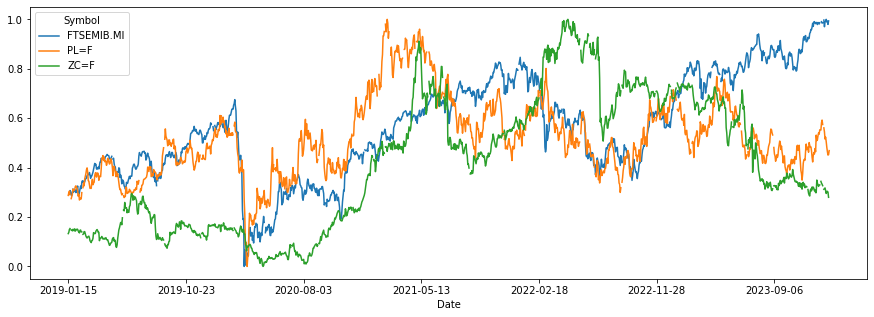

In [19]:
from ipywidgets import Layout, Button, Box, Dropdown,VBox,HBox,Output,RadioButtons
from IPython.display import clear_output
from sklearn import preprocessing
import pandas as pd
import io
import requests
from datetime import datetime

def on_button_clicked(b):
    clear_output()
    display(box)
    anni=int(radiob.value)
    plot_compare(symbol1=d1.value,symbol2=d2.value,years=anni)

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow
box_layout = Layout(display='flex',
                    flex_flow='rows', 
                    align_items='unset', 
                    border='solid',
                    width='100%')

lista1=list(commodities.values())

words = ['Uno', 'DUE',"Tre"]
options=[lista1,lista1,lista1]
items=[]
d1=Dropdown(description="Uno", layout=items_layout, button_style='danger',options=lista1)
items.append(d1)
d2=Dropdown(description="Due", layout=items_layout, button_style='danger',options=lista1)
items.append(d2)

radiob=RadioButtons(
    options=['1', '3', '5','10'],
    value='1', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='ANNI :',
    disabled=False
)
items.append(radiob)
button = Button(description="Compara")
button.on_click(on_button_clicked)
items.append(button)
box = HBox(children=items, layout=box_layout)

display(box)
#display(outs)

# Partendo da 100 a quanto arrivo ?

## Partendo da 100 :tutti i futures

Text(0.5, 1.0, 'Agricoli')

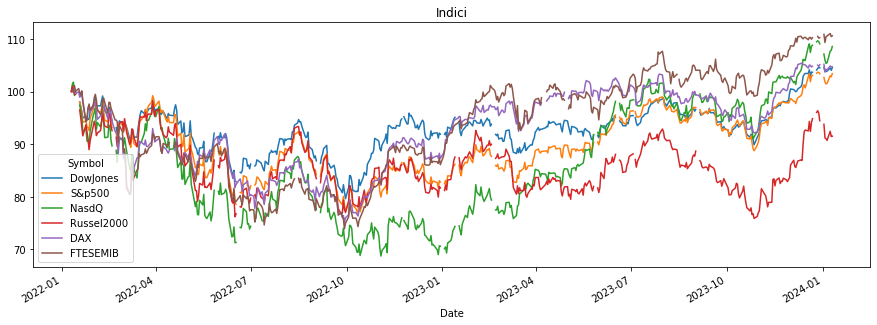

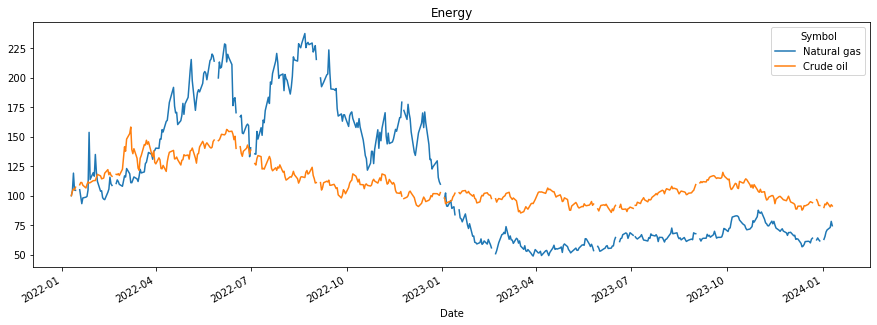

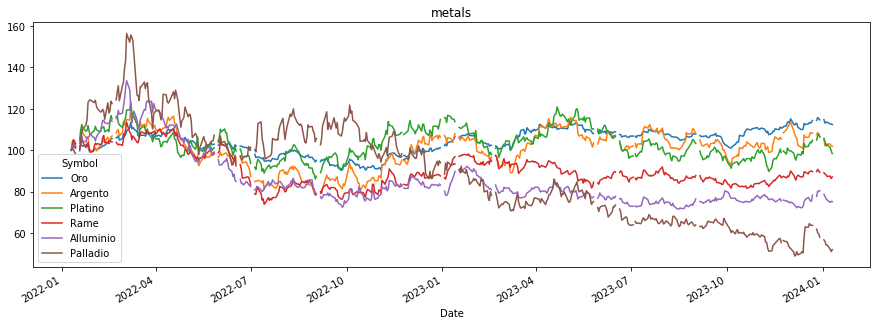

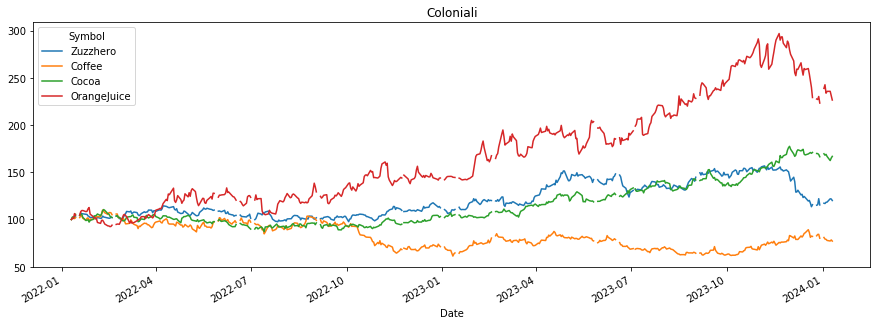

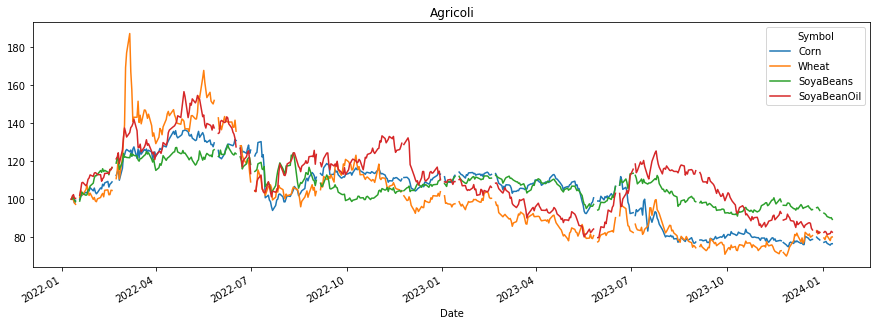

In [18]:

import numpy as np
dfx=df.pivot(index='Date',columns='Symbol',values='Close')
v1=100/dfx.apply(lambda x: pd.Series(x.dropna().values)).iloc[0:1,]
v1=v1.values.flatten().tolist()
dfy=dfx.multiply(np.array(v1), axis='columns')


#PLOT
ax=dfy.loc[:,index_values].plot(figsize=(15,5))
ax.set_title("Indici")
ax=dfy.loc[:,energy_values].plot(figsize=(15,5))
ax.set_title("Energy")
ax=dfy.loc[:,metal_values].plot(figsize=(15,5))
ax.set_title("metals")
ax=dfy.loc[:,colonial_values].plot(figsize=(15,5))
ax.set_title("Coloniali")
ax=dfy.loc[:,agricol_values].plot(figsize=(15,5))
ax.set_title("Agricoli")


## Partendo da 100 Compara 

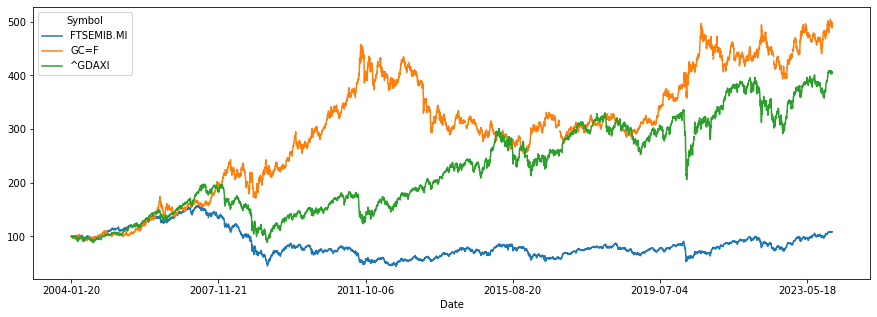

In [23]:

import numpy as np
def plot_compare_base100(symbol1,symbol2,years=1):
    _symbol1="GC=F"
    _symbol2="GC=F"
    for k,v in commodities.items():
        if v==symbol1:
            _symbol1=k
        if v==symbol2:
            _symbol2=k            
    
    df=getsymbol(_symbol1,days=years*365,proxy=proxies)
    if df is None:
        print("ERRORE CON SIMBOLO :",_symbol1,symbol1)
        return
    if symbol1!=symbol2:
        df2=getsymbol(_symbol2,days=years*365,proxy=proxies)
        if df2 is None:
            print("ERRORE CON SIMBOLO :",_symbol2)
            return
        df=df.append(df2).append(getsymbol("FTSEMIB.MI",days=years*365,proxy=proxies))
    else:
        df=df.append(getsymbol("FTSEMIB.MI",days=years*365,proxy=proxies))
    
    dfx=df.pivot(index='Date',columns='Symbol',values='Close')
    # Numero quote = 100/primo_prezzo_non_nullo
    v1=100/dfx.apply(lambda x: pd.Series(x.dropna().values)).iloc[0:1,]
    v1=v1.values.flatten().tolist()
    dfy=dfx.multiply(np.array(v1), axis='columns')
    #PLOT
    ax=dfy.plot(figsize=(15,5))

def on_button2_clicked(b):
    clear_output()
    display(box2)
    anni=int(radiob2.value)
    plot_compare_base100(symbol1=d1.value,symbol2=d2.value,years=anni)

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow
box_layout = Layout(display='flex',
                    flex_flow='rows', 
                    align_items='unset', 
                    border='solid',
                    width='100%')

lista1=list(commodities.values())


items2=[]
d1=Dropdown(description="Uno", layout=items_layout, button_style='danger',options=lista1)
items2.append(d1)
d2=Dropdown(description="Due", layout=items_layout, button_style='danger',options=lista1)
items2.append(d2)

radiob2=RadioButtons(
    options=['1', '3', '5','10','15','20'],
    value='1', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='ANNI :',
    disabled=False
)
items2.append(radiob2)
button2 = Button(description="Compara")
button2.on_click(on_button2_clicked)
items2.append(button2)
box2 = HBox(children=items2, layout=box_layout)

display(box2)

# PROVE

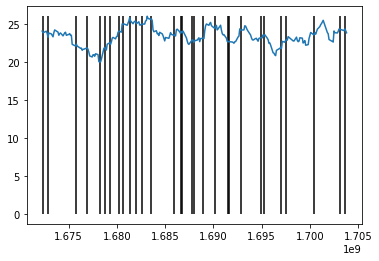

In [201]:
def trasf(r):
    d=r.Date
    ds="{}-{}-{}".format(d.year,d.month,d.day)
    return(unix_timestamp(ds))
y=dfx.loc[:,commodities["SI=F"]].dropna()
a=pd.Series(y.reset_index().apply(trasf, axis=1).values, index=y.index,name='unixdate')

y1=pd.concat([a,y],axis=1).set_index('unixdate')


m=y1.max()
x=y1.index
plt.plot(x,y)
#plt.plot(x,dydx
dx = x[1]-x[0]

dy=np.gradient(y1, dx,axis=0,edge_order=1)


slope=pd.Series(list(dy.flatten()),index=x)
z=slope[slope.abs()<0.0000004]
for i,v  in z.items():
    plt.vlines(i,ymin=0,ymax=m)

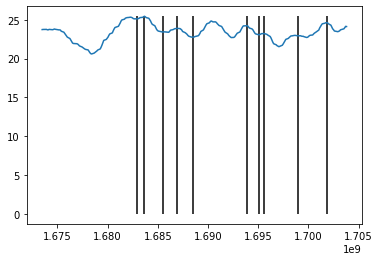

In [210]:
def trasf(r):
    d=r.Date
    ds="{}-{}-{}".format(d.year,d.month,d.day)
    return(unix_timestamp(ds))
y=dfx.loc[:,commodities["SI=F"]].dropna()
y=y.rolling(10).mean()
a=pd.Series(y.reset_index().apply(trasf, axis=1).values, index=y.index,name='unixdate')

y1=pd.concat([a,y],axis=1).set_index('unixdate')


m=y1.max()
x=y1.index
plt.plot(x,y)
#plt.plot(x,dydx
dx = x[1]-x[0]

dy=np.gradient(y1, dx,axis=0,edge_order=1)


slope=pd.Series(list(dy.flatten()),index=x)
z=slope[slope.abs()<0.00000009]
for i,v  in z.items():
    plt.vlines(i,ymin=0,ymax=m)

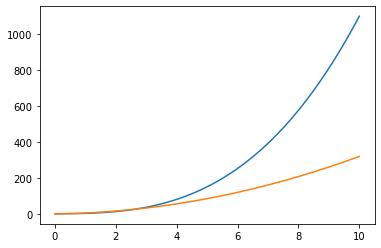

In [47]:
import numpy as np
x = np.linspace(0,10,1000)
dx = x[1]-x[0]
y = x**3 + x**2+1
dydx = np.gradient(y, dx)
plt.plot(x,y)
plt.plot(x,dydx)

Date
2022-12-29        NaN
2022-12-30        NaN
2023-01-03        NaN
2023-01-04        NaN
2023-01-05        NaN
               ...   
2023-12-22    23.6921
2023-12-26    23.8292
2023-12-27    23.9939
2023-12-28    24.1434
2023-12-29    24.1191
Name: Argento, Length: 252, dtype: float64